<div>
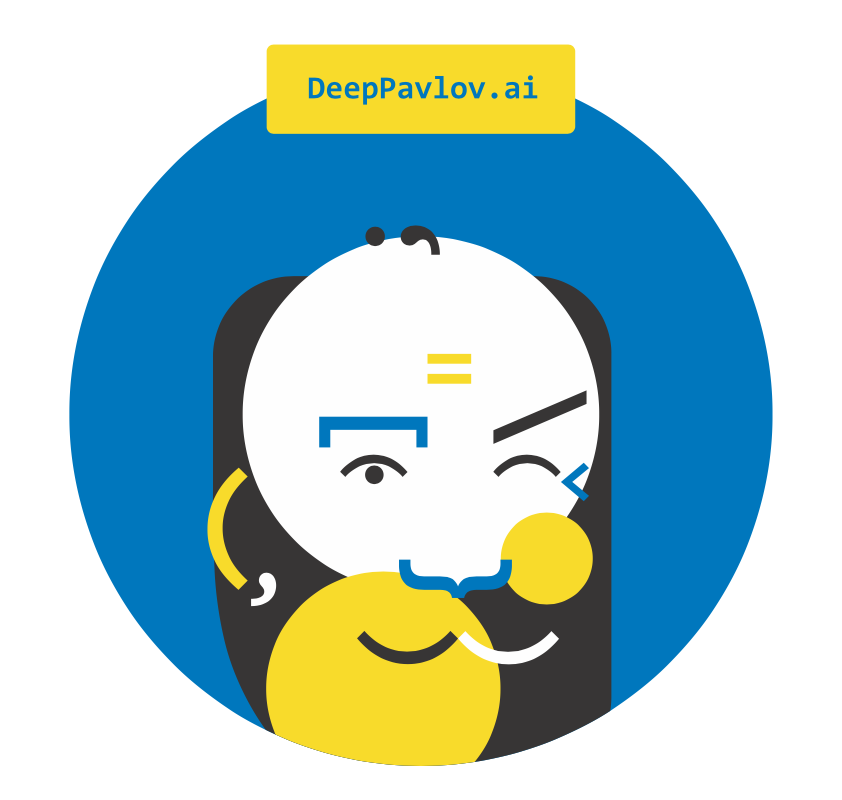
</div>

# <center>Relation Extraction for Russian</center>

<center>In this small tutorial, we are going to show how we could use relation extraction for the Russian language.</center> 

# 1. Data

The model was trained on [RuRed corpus](http://www.dialog-21.ru/media/5093/gordeevdiplusetal-031.pdf) for relation extracton task for Russian language based on the Lenta.ru news corpus. 

### <center>Dataset size</center>

In case of RuRED we used the train, dev and test sets from the original RuRED setting. We additionally generate negative samples if it was necessary to have the following proportions:

- for train set: negative samples are twice as many as positive ones
- for dev & test set: negative samples are the same amount as positive ones

| Train | Dev | Test |
| --- | --- | --- |
| 12855 | 1076 | 1072 |


| Train Positive | Train Negative | Dev Positive | Dev Negative | Test Positive | Test Negative |
| --- | --- | --- | --- | --- | --- |
| 4285 | 8570 | 538 | 538 | 536 | 536 |



### <center>Relation statistics</center>

| Relation | Relation id | Russian relation | # samples (train) | # samples (valid) |# samples (test) |
| --- | --- | --- | --- | --- | --- |
| MEMBER | P710 | участник | 104 | 20 | 9 | 
| WORKS_AS | P106 | род занятий | 962 | 126 | 121 | 
| WORKPLACE |  |  | 932 | 93 | 119 | 
| OWNERSHIP | P1830 | владеет | 784 | 107 | 99 | 
| SUBORDINATE_OF | - | - | 30 | 4 | 3 | 
| TAKES_PLACE_IN | P276 | местонахождение | 66 | 6 | 7 | 
| EVENT_TAKES_PART_IN | P1344 | участвовал в | 143 | 22 | 12 | 
| SELLS_TO | - | - | 323 | 37 | 44 | 
| ALTERNATIVE_NAME | - | - | 137 | 19 | 12 | 
| HEADQUARTERED_IN | P159 | расположение штаб-квартиры | 451 | 69 | 61 | 
| PRODUCES | P1056 | продукция | 42 | 4 | 6 | 
| ABBREVIATION | - | - | 92 | 5 | 11 | 
| DATE_DEFUNCT_IN | P576 | дата прекращения существования | 4 | - | - |
| SUBEVENT_OF | P361 | часть от | 10 | 1 | 1 | 
| DATE_FOUNDED_IN | P571 | дата основания/создания/возникновения | 16 | 1 | 2 | 
| DATE_TAKES_PLACE_ON | P585 | момент времени | 40 | 4 | 5 | 
| NUMBER_OF_EMPLOYEES_FIRED | - | - | 12 | 3 | 1 | 
| ORIGINS_FROM | P495 | страна происхождения | 43 | 6 | 5 | 
| ACQUINTANCE_OF | - | - | 3 | - | - |
| PARENT_OF | P40 | дети | 14 | 1 | 2 | 
| ORGANIZES | P664 | организатор | 46 | 8 | 7 | 
| FOUNDED_BY | P112 | основатель | 13 | - | 3 | 
| PLACE_RESIDES_IN | P551 | место жительства | 8 | 1 | 2 | 
| BORN_IN | P19 | место рождения | 1 | - | - | 
| AGE_IS | - | - | 1 | 1 | 1 | 
| RELATIVE | - | - | 2 | - | - |
| NUMBER_OF_EMPLOYEES | P1128 | число сотрудников | 4 | - |  2 | 
| SIBLING | P3373 | брат/сестра | 1 | - | 1 | 
| DATE_OF_BIRTH | P569 | дата рождения | 1 | - | - | 

 ### <center>NER statistics</center>

| # | NER tag | Description |
| --- | --- | --- |
1. | WORK_OF_ART | name of work of art |
2. | NORP | affiliation |
3. | GROUP | unnamed groups of people and companies |
4. | LAW | law name |
5. | NATIONALITY | names of nationalities |
6. | EVENT | event name |
7. | DATE | date value |
8. | CURRENCY | names of currencies |
9. | GPE | geo-political entity |
10. | QUANTITY | quantity value |
11. | FAMILY | families as a whole |
12. | ORDINAL | ordinal value |
13. | RELIGION | names of religions |
14. | CITY | Names of cities, towns, and villages |
15. | MONEY | money name |
16. | AGE | people's and object's ages |
17. | LOCATION | location name |
18. | PERCENT | percent value |
19. | BOROUGH | Names of sub-city entities |
20. | PERSON | person name |
21. | REGION |   Names of sub-country entities |
22. | COUNTRY | Names of countries |
23. | PROFESSION | Professions and people of these professions. |
24. | ORGANIZATION | organization name |
25. | FAC | building name |
26. | CARDINAL | cardinal value |
27. | PRODUCT | product name |
28. | TIME | time value |
29. | STREET | street name |

<b>NER tags in train data:</b>

<div>

</div>

<b>NER tags in dev data:</b>


<div>

</div>

<b>NER tags in test data:</b>

<div>

</div>

# 2. Trained model

<i> please refer to Relation_extraction_English_tutorial - the same model architecture was used </i>

# 3. Config

In [13]:
# here is the config file
%cat deeppavlov/configs/relation_extraction/re_rured.json

{
  "dataset_reader": {
    "class_name": "rured_reader",
    "data_path": "{DOWNLOADS_PATH}/rured/"
  },
  "dataset_iterator": {
    "class_name": "basic_classification_iterator"
  },
  "chainer": {
    "in": ["input_x"],
    "in_y": ["y_ids"],
    "pipe": [
      {
        "in": ["input_x"],
        "out": ["input_x_bert"],
        "class_name": "torch_transformers_re_preprocessor",
        "ner_tags": ["WORK_OF_ART", "NORP", "GROUP", "LAW", "NATIONALITY", "EVENT", "DATE", "CURRENCY", "GPE",
                     "QUANTITY", "FAMILY", "ORDINAL", "RELIGION", "CITY", "MONEY", "AGE", "LOCATION", "PERCENT",
                     "BOROUGH", "STREET", "PERSON", "REGION", "COUNTRY", "PROFESSION", "ORGANIZATION", "FAC",
                     "CARDINAL", "PRODUCT", "TIME"],
        "max_seq_length": 512,
        "vocab_file": "{TRANSFORMER}"
      },
      {
        "class_name": "re_torch_transformers_classifier",
        "in": ["input_x_bert"],
        "in_y": ["y_ids"],
        "out": ["model

The model was already trained with ```python3.7 -m deeppavlov train re_rured```.

The trained weights could be dowloaded with ```!python -m deeppavlov download re_rured```. We have already done it in advance and can initialize the model now.

# 5. Predictions 

In [2]:
from deeppavlov import configs, build_model
re = build_model(configs.relation_extraction.re_rured, download=False)

[nltk_data] Downloading package punkt to /home/evseev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/evseev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2021-07-16 16:37:49.901 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 145: Load path /cephfs/home/evseev/.deeppavlov/models/re_rured/model is given.
2021-07-16 16:37:49.907 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 152: Load path /cephfs/home/evseev/.deeppavlov/models/re_rured/model.pth.tar exists.
2021-07-16 16:37:49.909 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 153:

In [3]:
# example 1
# Elon Musk lives in Seattle.

sentence = ["Илон", "Маск", "живет", "в", "Сиэттле", "."]
entity_info = [[(0, 2)], [(4, 6)], "PERSON", "CITY"]

res = re(([[sentence, entity_info]]))
print(res)

[[('P551', 'место жительства')]]


In [6]:
# example 2
# However, Elon Musk was born in South Africa.

sentence = ["Но", "родился", "Илон", "Маск", "в", "Южной", "Америке", "."]
entity_info = [[(2, 4)], [(6, 8)], "PERSON", "REGION"]

res = re(([[sentence, entity_info]]))
print(res)

[[('P495', 'страна происхождения')]]


In [4]:
# example 3
# Elon Musk lives in Seattle and owns Tesla company.

sentence = ["Илон", "Маск", "живет", "в", "Сиэттле", "и", "владеет", "компанией", "Тесла", "."]
entity_info = [[(0, 2)], [(8, 9)], "PERSON", "ORGANIZATION"]

res = re(([[sentence, entity_info]]))
print(res)

[[('P1830', 'владеет')]]


In [5]:
# example 4
# Head office of Tesla is located in New York.

sentence = ["Главный", "офис", "Тесла", "находится", "в", "Нью-Йорке", "."]
entity_info = [[(2, 3)], [(5, 6)], "ORGANIZATION", "CITY"]

res = re(([[sentence, entity_info]]))
print(res)

[[('P159', 'расположение штаб-квартиры')]]


In [7]:
# example 5
# Elon Musk sun's name is X Æ A-Xii.

sentence = ["Сына", "Илона", "Маска", "зовут", "X Æ A-Xii", "."]
entity_info = [[(1, 3)], [(4, 5)], "PERSON", "PERSON"]

res = re(([[sentence, entity_info]]))
print(res)

[[('P40', 'дети')]]


In [11]:
# example 6
# Elon Musk is 50 years old.

sentence = ["Илону", "Маску", "50", "лет", "."]
entity_info = [[(0, 2)], [(2, 3)], "PERSON", "AGE"]

res = re(([[sentence, entity_info]]))
print(res)

[[('AGE_IS', 'AGE_IS')]]


Congarts! You tried relation extractoin for Russian with DeepPavlov. More tutorials are yet to come :)